<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/reinforce/PPO_REINFORCE_COMPARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
env_name = 'LunarLander-v2'
max_episodes = 1000
print_interval = 100
roll_mean = 30

# Reinforce

Episode 100	Average Score: -210.65
Episode 200	Average Score: -184.53
Episode 300	Average Score: -196.43
Episode 400	Average Score: -151.37
Episode 500	Average Score: -138.92
Episode 600	Average Score: -133.04
Episode 700	Average Score: -150.18
Episode 800	Average Score: -94.81
Episode 900	Average Score: -90.25
Episode 1000	Average Score: -324.18


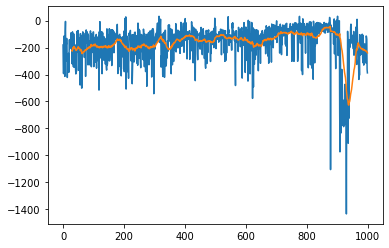

In [ ]:
url = 'https://gist.githubusercontent.com/skywalker0803r/e3670ecbdc13ea04fb33d3035b5b9147/raw/c617f22c94bf1e3ef9115509e12fefba7a83725b/reinforce.py'
exec(requests.get(url).text)
env = gym.make(env_name)
history_reinforce = reinforce(env,n_episodes=max_episodes,print_every=print_interval)
plt.plot(history_reinforce)
plt.plot(pd.Series(history_reinforce).rolling(roll_mean).mean())

In [ ]:
#pip install gym[box2d]

# PPO

Episode 0: -12.304713366946146
Episode 100: -1.1465515529330252
Episode 200: 37.30182195250566
Episode 300: 212.59093530585727
Episode 400: 12.17361307220824
Episode 500: -98.78930332598304
Episode 600: 209.63488350611652
Episode 700: 18.548254593708755
Episode 800: 211.82887146766643
Episode 900: 215.17776149933965


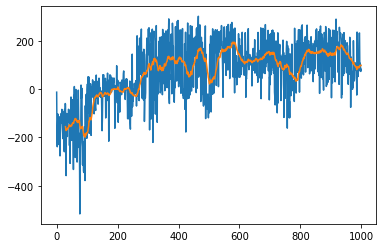

In [ ]:
url = 'https://gist.githubusercontent.com/skywalker0803r/c363d8b2cf72a8aee06bc238a355fa01/raw/950f12a95eaab432a76dcf070fc40630b555a254/PPO.py'
exec(requests.get(url).text)
env = gym.make(env_name)
agent = PPOAgent(env)
history_ppo = agent.train(max_episodes=max_episodes,print_interval=print_interval)
plt.plot(history_ppo)
plt.plot(pd.Series(history_ppo).rolling(roll_mean).mean())

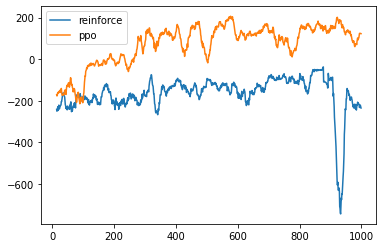

In [ ]:
plt.plot(pd.Series(history_reinforce).rolling(15).mean(),label='reinforce')
plt.plot(pd.Series(history_ppo).rolling(15).mean(),label='ppo')
plt.legend()
plt.show()